<a href="https://colab.research.google.com/github/sorinnicumarian/stock_prediction_linear_regression/blob/main/Medium_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inspired from https://medium.com/@varun.tyagi83/stock-price-prediction-with-machine-learning-02c9cce35aab

[*********************100%***********************]  1 of 1 completed


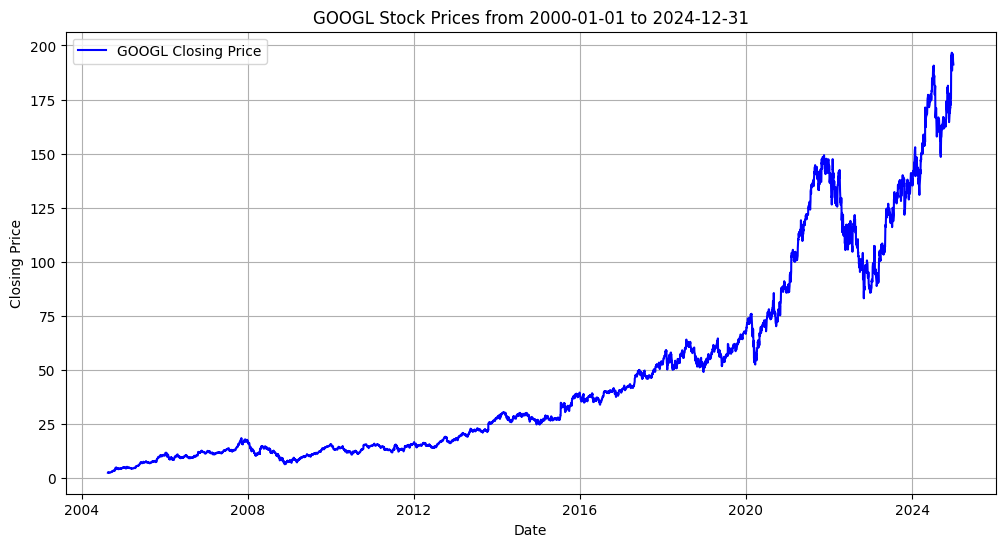


Predicted Stock Price for the next day: 193.07

Model Evaluation Results:
R-squared: 0.9909
Adjusted R-squared: 0.99
Mean Squared Error on Test Data: 6.13


In [105]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf
import matplotlib.pyplot as plt

def main():
    ticker = 'GOOGL'
    start_date = '2000-01-01'
    end_date = '2024-12-31'
    stock_data = download_stock_data(ticker, start_date, end_date)
    plot_stock_data(stock_data, ticker, start_date, end_date)
    sequence_length = 10
    data_sequences = preprocess_data(stock_data, sequence_length)
    train_data, test_data = split_data(data_sequences)
    X_train = np.array([item[0] for item in train_data])
    y_train = np.array([item[1] for item in train_data])
    X_test = np.array([item[0] for item in test_data])
    y_test = np.array([item[1] for item in test_data])
    model = train_model(X_train, y_train)
    last_sequence = X_test[-1].reshape(1, -1)
    predicted_price = model.predict(last_sequence).item()
    print(f'\nPredicted Stock Price for the next day: {predicted_price:.2f}')
    mse, r2, adjusted_r2 = evaluate_model(model, X_test, y_test)
    print(f'\nModel Evaluation Results:')
    print(f'R-squared: {r2:.4f}')
    print(f'Adjusted R-squared: {adjusted_r2:.2f}')
    print(f'Mean Squared Error on Test Data: {mse:0.2f}')

def download_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

def preprocess_data(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data.iloc[i:i + sequence_length].values.flatten()
        target = data.iloc[i + sequence_length]
        sequences.append((sequence, target))
    return sequences

def split_data(data, test_size=0.2):
    train_data, test_data = train_test_split(data, test_size=test_size, shuffle=False)
    return train_data, test_data

def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return mse, r2, adjusted_r2

def plot_stock_data(stock_data, ticker, start_date, end_date):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data, label=f'{ticker} Closing Price', color='blue')
    plt.title(f'{ticker} Stock Prices from {start_date} to {end_date}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()



def predict_stock_prices(model, last_sequence, n_days):
    predictions = []
    current_sequence = last_sequence

    for _ in range(n_days):
        predicted_price = model.predict(current_sequence.reshape(1, -1)).item()
        predictions.append(predicted_price)
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = predicted_price

    return predictions

def predict_and_plot(ticker, start_date, end_date, sequence_length=10):
    stock_data = download_stock_data(ticker, start_date, end_date)
    data_sequences = preprocess_data(stock_data, sequence_length)
    last_sequence = np.array(data_sequences[-1][0])
    X_train = np.array([item[0] for item in data_sequences])
    y_train = np.array([item[1] for item in data_sequences])
    model = train_model(X_train, y_train)
    predicted_prices = predict_stock_prices(model, last_sequence, len(stock_data))
    actual_data = download_stock_data(ticker, start_date, end_date)

    plt.figure(figsize=(12, 6))
    plt.plot(actual_data.index, predicted_prices, label='Predicted Prices (2024)', color='red')
    plt.plot(actual_data.index, actual_data.values, label='Actual Prices (2024)', color='green')
    plt.title(f'{ticker} Stock Prices Predictions vs Actual Prices for 2024')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

predict_and_plot('GOOGL', '2024-01-01', '2025-01-22')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


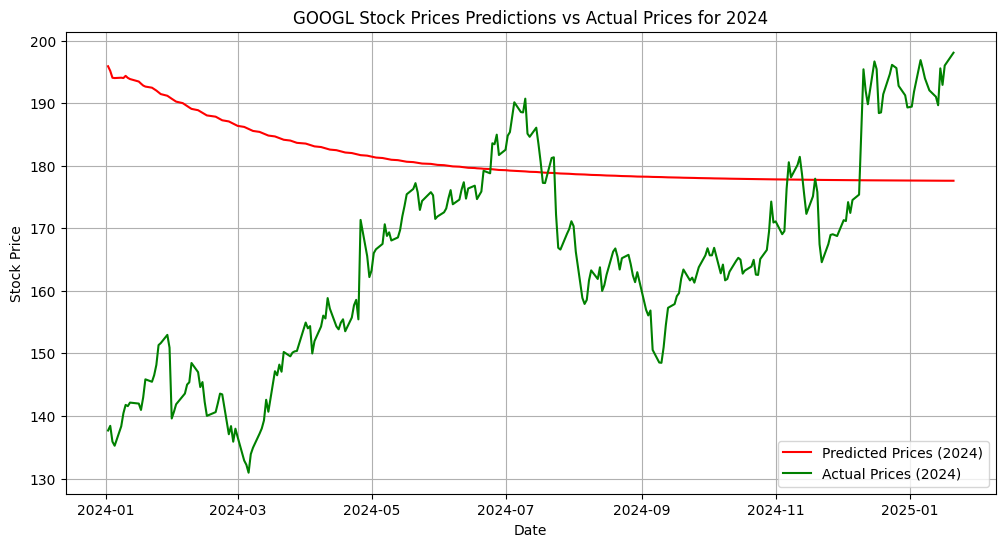

In [106]:
def predict_stock_prices(model, last_sequence, n_days):
    predictions = []
    current_sequence = last_sequence

    for _ in range(n_days):
        predicted_price = model.predict(current_sequence.reshape(1, -1)).item()
        predictions.append(predicted_price)
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = predicted_price

    return predictions

def predict_and_plot(ticker, start_date, end_date, sequence_length=10):
    stock_data = download_stock_data(ticker, start_date, end_date)
    data_sequences = preprocess_data(stock_data, sequence_length)
    last_sequence = np.array(data_sequences[-1][0])
    X_train = np.array([item[0] for item in data_sequences])
    y_train = np.array([item[1] for item in data_sequences])
    model = train_model(X_train, y_train)
    predicted_prices = predict_stock_prices(model, last_sequence, len(stock_data))
    actual_data = download_stock_data(ticker, start_date, end_date)

    plt.figure(figsize=(12, 6))
    plt.plot(actual_data.index, predicted_prices, label='Predicted Prices (2024)', color='red')
    plt.plot(actual_data.index, actual_data.values, label='Actual Prices (2024)', color='green')
    plt.title(f'{ticker} Stock Prices Predictions vs Actual Prices for 2024')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

predict_and_plot('GOOGL', '2024-01-01', '2025-01-22')